## 1. Подключение библиотек

In [1]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df_one =pd.read_csv("habr_parsing.csv")
df_two =pd.read_csv("json_dataset.csv")
df_three =pd.read_csv("PDF_dataset.csv")

In [4]:
df_two = df_two.drop(columns=['Unnamed: 0'])
df_three = df_three.drop(columns=['Unnamed: 0'])

In [5]:
df_one.columns = ['title', 'nameCompany', 'description', 'rating', 'field', 'date', 'textpub', 'views']
df_one.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN  
1    Пандемия, последствия которой до сих пор наб...    NaN  
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN  
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN  
4  Развитие информационных технологий — от первых...    NaN

In [6]:
df_two.columns = ['nameCompany', 'description', 'textpub', 'date', 'rating', 'views']
df_two.head()

nameCompany                                        description  \
0  Cybersport.Metaratings    Киберспортивное медиа и аналитическая платформа   
1         ESforce Holding  Крупнейший холдинг в сфере киберспорта и игров...   
2         ESforce Holding  Крупнейший холдинг в сфере киберспорта и игров...   
3         ESforce Holding  Крупнейший холдинг в сфере киберспорта и игров...   
4         ESforce Holding  Крупнейший холдинг в сфере киберспорта и игров...   

                                             textpub             date  rating  \
0  7 декабря состоялась церемония награждения лау...  8 декабря 09:30     6.0   
1  7 декабря состоялась церемония награждения лау...  8 декабря 09:30     6.0   
2  Из совместного исследования издателя компьютер...    29 июля 13:50    12.0   
3  По статистике The Esports Observer за I полови...     9 июля 09:33    18.0   
4  Компании SuperData Research и PayPal провели с...  11 апреля 12:43    11.0   

   views  
0   2300  
1   2300  
2   2800  
3   6200  
4  10000

In [7]:
df_three.columns = ['nameCompany', 'rating', 'date', 'description', 'textpub']
df_three.head()

nameCompany  rating        date  \
0               red_mad_robot  117.94  2025-03-21   
1  Технократия @technokratiya    4.40         NaN   
2                     Cloud4Y   71.07  2025-03-21   
3                      Kaiten   87.20  2025-03-27   
4                     Cloud4Y   71.07  2025-03-21   

                                       description  \
0     №1 в разработке цифровых решений для бизнеса   
1                                      ИТ-Компания   
2              #1 Корпоративный облачный провайдер   
3  Российский сервис для совместной работы команд.   
4              #1 Корпоративный облачный провайдер   

                                             textpub  
0  117.94\nРейтинг\nred_mad_robot\n№1 в разработк...  
1  Еще до начала MWC в Барселоне было очевидно, ч...  
2  71.07\nРейтинг\nCloud4Y\n#1 Корпоративный обла...  
3  87.2\nРейтинг\nKaiten\nРоссийский сервис для с...  
4  71.07\nРейтинг\nCloud4Y\n#1 Корпоративный обла...

In [8]:
df = pd.concat([df_one, df_two, df_three])
df = df.reset_index(drop=True)

In [9]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN  
1    Пандемия, последствия которой до сих пор наб...    NaN  
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN  
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN  
4  Развитие информационных технологий — от первых...    NaN

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        90 non-null     object 
 1   nameCompany  1225 non-null   object 
 2   description  1225 non-null   object 
 3   rating       1227 non-null   float64
 4   field        89 non-null     object 
 5   date         1224 non-null   object 
 6   textpub      1227 non-null   object 
 7   views        1112 non-null   float64
dtypes: float64(2), object(6)
memory usage: 76.8+ KB


In [11]:
df = df.drop('views', axis=1)

In [12]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...  
1    Пандемия, последствия которой до сих пор наб...  
2  Привет! Я Диана, системный аналитик в Cleverte...  
3  Привет, Хабр. На связи команда Т1 Облако. Если...  
4  Развитие информационных технологий — от первых...

## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [13]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [14]:
df['text_new'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['textpub']]

In [15]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т1 Облако. Если...   
4  Развитие информационных технологий — от первых...   

                                            text_new  
0  привет хабр меня зовут сергей арефьев я специа...  
1   пандемия последствия которой до сих пор наблю...  
2  привет я диана системный аналитик в clevertec ...  
3  привет хабр на связи команда т облако если вы ...  
4  развитие информационных технологий от первых а...

In [16]:
russian_stopwords = stopwords.words("russian") 
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [17]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который', 'которая', 'с','своём','всем','наш', 'свой']) 

In [18]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [19]:
df['tokenize_text'] = [tokenize(text) for text in df['text_new']]

In [20]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т1 Облако. Если...   
4  Развитие информационных технологий — от первых...   

                                            text_new  \
0  привет хабр меня зовут сергей арефьев я специа...   
1   пандемия последствия которой до сих пор наблю...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий от первых а...   

                                       tokenize_text  
0  привет хабр зовут сергей арефьев специалист от...  
1  пандемия последствия которой сих пор наблюдают...  
2  привет диана системный аналитик clevertec экс ...  
3  привет хабр связи команда облако следите новос...  
4  развитие информационных технологий первых алго...

In [21]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [22]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т1 Облако. Если...   
4  Развитие информационных технологий — от первых...   

                                            text_new  \
0  привет хабр меня зовут сергей арефьев я специа...   
1   пандемия последствия которой до сих пор наблю...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий от первых а...   

                                       tokenize_text  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия которой сих пор наблюдают...   
2  привет диана системный аналитик clevertec экс ...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                           text_stem  
0  привет хабр зовут серг ареф специалист отдел а...  
1  пандем последств котор сих пор наблюда всем ми...  
2  привет диа системн аналитик clevertec экс преп...  
3  привет хабр связ команд облак след новост мир ...  
4  развит информацион технолог перв алгоритм нейр...

In [23]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [24]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 6min 23s
Wall time: 7min 12s


In [25]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т1 Облако. Если...   
4  Развитие информационных технологий — от первых...   

                                            text_new  \
0  привет хабр меня зовут сергей арефьев я специа...   
1   пандемия последствия которой до сих пор наблю...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий от первых а...   

                                       tokenize_text  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия которой сих пор наблюдают...   
2  привет диана системный аналитик clevertec экс ...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                           text_stem  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств котор сих пор наблюда всем ми...   
2  привет диа системн аналитик clevertec экс преп...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                           text_lemm  
0  привет хабра звать сергей арефьев специалист о...  
1  пандемия последствие который сей пора наблюдат...  
2  привет диана системный аналитик clevertec экс ...  
3  привет хабра связь команда облако следить ново...  
4  развитие информационный технология первый алго...

In [26]:
df['text_lemm'] = [tokenize(text) for text in df['text_lemm']]

In [27]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т1 Облако. Если...   
4  Развитие информационных технологий — от первых...   

                                            text_new  \
0  привет хабр меня зовут сергей арефьев я специа...   
1   пандемия последствия которой до сих пор наблю...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий от первых а...   

                                       tokenize_text  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия которой сих пор наблюдают...   
2  привет диана системный аналитик clevertec экс ...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                           text_stem  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств котор сих пор наблюда всем ми...   
2  привет диа системн аналитик clevertec экс преп...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                           text_lemm  
0  привет хабра звать сергей арефьев специалист о...  
1  пандемия последствие сей пора наблюдаться весь...  
2  привет диана системный аналитик clevertec экс ...  
3  привет хабра связь команда облако следить ново...  
4  развитие информационный технология первый алго...

# Облако слов

In [28]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

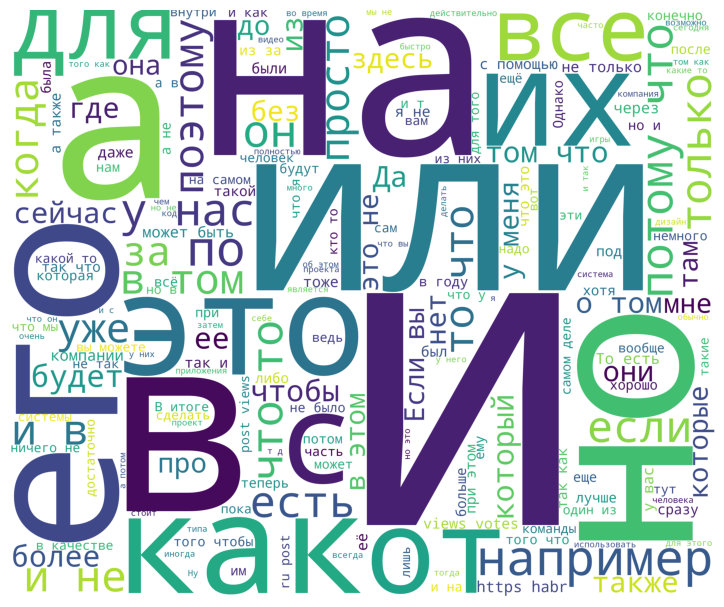

In [31]:
corpus = get_corpus(df['textpub'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

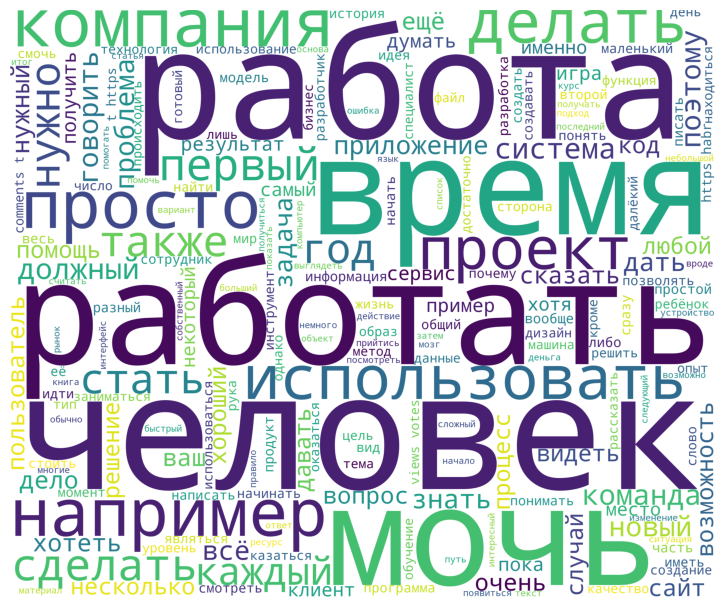

In [ ]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [35]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

<Axes: >

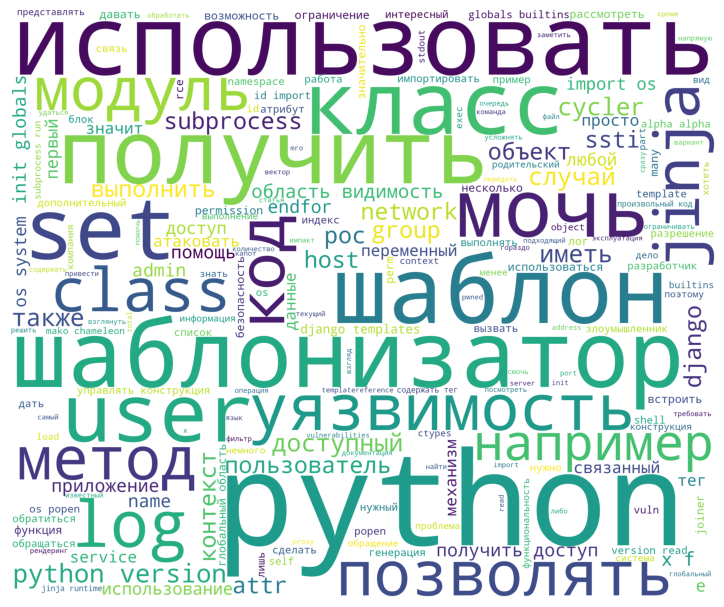

In [36]:
corpus = df['text_lemm'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

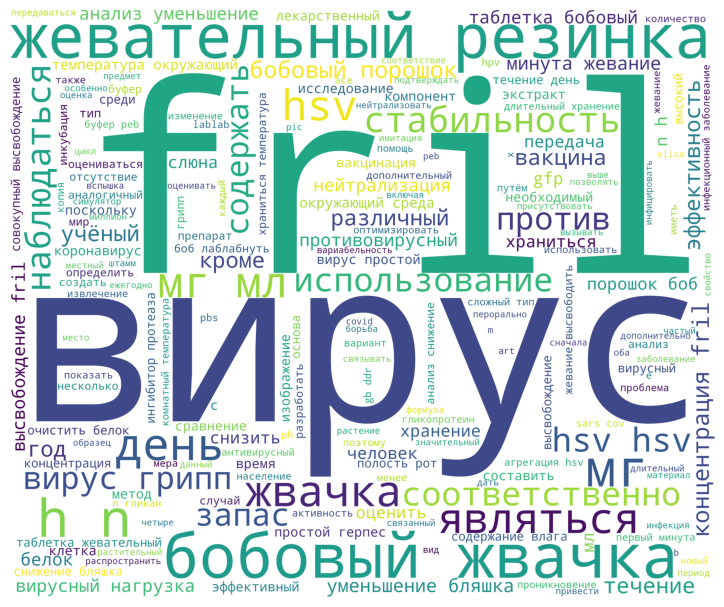

In [ ]:
corpus = df['text_lemm'][1]
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

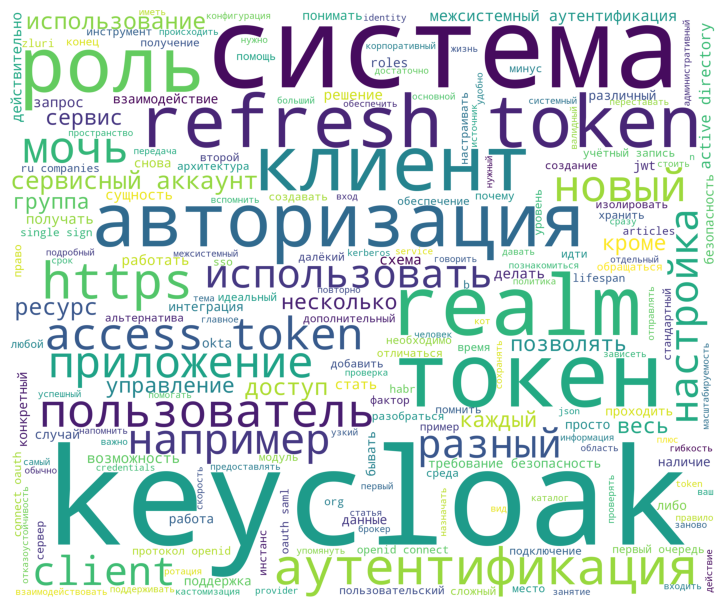

In [37]:
corpus = df['text_lemm'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

# Векторизация текстовых данных

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
df['text_lemm'][0]

'привет хабра звать сергей арефьев специалист отдел анализ защищённость приложение компания bi zone статья хотеть подробно раскрыть тема ssti server side template injection контекст python сразу оговориться новый ресерч rocket science вектор лишь взять известный poc посмотреть почему работать полный понимание вопрос рассмотреть импакт атаковать мочь получить использовать ssti пять самый популярный шаблонизатор python jinja django templates mako chameleon tornado templates кроме немного углубиться работа известный poc поделиться опыт вариант улучшение poc мочь полезный тестирование несколько слово шаблонизаторахначнуть базовый шаблонизатор применяться встретить шаблонизатор инструмент динамический генерация текстовый данные основа заранее задать шаблон частый встретить веб приложение использоваться рендеринг html страница сервер последний несколько год концепция стать менее популярный уступить место клиентский рендеринг html формироваться непосредственно браузер помощь javascript фреймв

In [40]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [41]:
print(vectorizer.vocabulary_)

{'привет': 58425, 'хабра': 73488, 'звать': 36900, 'сергей': 65076, 'арефьев': 24388, 'специалист': 67268, 'отдел': 52008, 'анализ': 23960, 'защищённость': 36874, 'приложение': 58716, 'компания': 40775, 'bi': 1965, 'zone': 22892, 'статья': 67836, 'хотеть': 74057, 'подробно': 55728, 'раскрыть': 61880, 'тема': 69427, 'ssti': 18999, 'server': 18008, 'side': 18307, 'template': 19923, 'injection': 9673, 'контекст': 41081, 'python': 16057, 'сразу': 67553, 'оговориться': 50623, 'новый': 49534, 'ресерч': 62946, 'rocket': 17186, 'science': 17706, 'вектор': 27561, 'лишь': 43241, 'взять': 27995, 'известный': 37517, 'poc': 15345, 'посмотреть': 57243, 'почему': 57639, 'работать': 60912, 'полный': 56425, 'понимание': 56791, 'вопрос': 28969, 'рассмотреть': 62089, 'импакт': 37875, 'атаковать': 24653, 'мочь': 46061, 'получить': 56593, 'использовать': 38635, 'пять': 60881, 'самый': 64193, 'популярный': 56963, 'шаблонизатор': 75251, 'jinja': 10395, 'django': 5349, 'templates': 19927, 'mako': 12001, 'chame

In [42]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [43]:
count_matrix.shape

(1227, 274234)

In [44]:
vectorizer.get_feature_names_out()[45000:46000]

array(['всякий пожарный', 'всякий пожарный пояснить',
       'всякий пожарный точно', 'всякий полезный', 'всякий посторонний',
       'всякий посторонний продажный', 'всякий похвала',
       'всякий проблема', 'всякий проект', 'всякий радикал',
       'всякий радикал марсианин', 'всякий разный', 'всякий род',
       'всякий система', 'всякий случай', 'всякий случай близкий',
       'всякий случай говорить', 'всякий случай деньга',
       'всякий случай напомнить', 'всякий случай особый',
       'всякий случай подвалить', 'всякий случай пока',
       'всякий случай среди', 'всякий случай таковой',
       'всякий случай удостовериться', 'всякий случай укв',
       'всякий случай уточнить', 'всякий слыхать',
       'всякий слыхать припомнить', 'всякий смысл', 'всякий сомнение',
       'всякий сомнительный', 'всякий сомнительный коммерсант',
       'всякий странный', 'всякий твой', 'всякий твой место',
       'всякий телеком', 'всякий телеком прочий', 'всякий тёмный',
       'всякий тёмный

In [45]:
print(count_matrix)

  (0, 181705)	1
  (0, 260397)	1
  (0, 79377)	1
  (0, 218269)	1
  (0, 232271)	1
  (0, 149798)	1
  (0, 22253)	1
  (0, 79239)	1
  (0, 183171)	9
  (0, 99139)	4
  (0, 1789)	1
  (0, 19812)	1
  (0, 237071)	3
  (0, 261957)	4
  (0, 163855)	1
  (0, 204112)	1
  (0, 244591)	2
  (0, 15503)	3
  (0, 15713)	1
  (0, 17118)	2
  (0, 8324)	1
  (0, 101615)	10
  (0, 13610)	39
  (0, 234194)	3
  (0, 142543)	1
  :	:
  (1226, 112044)	1
  (1226, 227813)	1
  (1226, 92945)	1
  (1226, 112570)	1
  (1226, 218431)	1
  (1226, 32978)	1
  (1226, 4355)	1
  (1226, 11046)	1
  (1226, 1448)	1
  (1226, 18948)	1
  (1226, 4942)	1
  (1226, 17043)	1
  (1226, 144608)	1
  (1226, 202421)	1
  (1226, 21033)	1
  (1226, 227812)	1
  (1226, 92940)	1
  (1226, 23206)	1
  (1226, 206138)	1
  (1226, 203274)	1
  (1226, 239791)	1
  (1226, 195797)	1
  (1226, 144609)	1
  (1226, 202726)	1
  (1226, 74582)	1


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [48]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 21.9 s
Wall time: 24.8 s


In [49]:
tfidf_matrix.shape

(1227, 10000)

In [50]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['about', 'academy', 'access', 'accessibility', 'action', 'active',
       'add', 'address', 'adobe', 'advanced', 'after', 'agency', 'agent',
       'agile', 'ai', 'aic', 'airbnb', 'all', 'alpha', 'amazon', 'an',
       'analysis', 'analytics', 'and', 'android', 'android ios',
       'android приложение', 'android разработка', 'android разработчик',
       'angular', 'any', 'apache', 'api', 'app', 'app store', 'append',
       'apple', 'application', 'apps', 'ar', 'architecture', 'arduino',
       'are', 'args', 'arm', 'array', 'art', 'articles', 'as', 'async',
       'at', 'audio', 'auto', 'avito', 'awesome', 'aws', 'azure', 'back',
       'backend', 'background', 'badoo', 'bar', 'base', 'based', 'bash',
       'basic', 'be', 'before', 'begin', 'best', 'beta', 'beyond', 'bi',
       'big', 'big data', 'bin', 'black', 'block', 'blog', 'blue',
       'bluetooth', 'board', 'body', 'bold', 'boolean', 'boot',
       'bootstrap', 'bot', 'box', 'brain', 'break', 'buffer', 'build',
    

In [52]:
print(tfidf_matrix)

  (0, 6512)	0.012864084577042608
  (0, 7728)	0.011405357919969883
  (0, 3284)	0.01003683602298716
  (0, 2603)	0.011225517138212628
  (0, 9579)	0.01105728732193323
  (0, 9597)	0.010609332571177268
  (0, 2334)	0.012975022912604002
  (0, 6288)	0.012864084577042608
  (0, 6291)	0.01333933441950243
  (0, 3486)	0.01018798893955725
  (0, 6340)	0.01255706455086218
  (0, 5086)	0.010848643402471221
  (0, 6962)	0.013473038466931547
  (0, 6366)	0.012196953943245008
  (0, 9596)	0.013090893430223181
  (0, 6873)	0.01333933441950243
  (0, 7663)	0.009964424215531991
  (0, 3656)	0.012975022912604002
  (0, 1156)	0.007935285387581094
  (0, 2316)	0.012370795510755001
  (0, 289)	0.042267669101900725
  (0, 7851)	0.009537224718723133
  (0, 6122)	0.011598532016935696
  (0, 6374)	0.011666241211822168
  (0, 6369)	0.011468171982075325
  :	:
  (1226, 8166)	0.014429033905253352
  (1226, 2880)	0.005191909062279835
  (1226, 8588)	0.013525110868328093
  (1226, 2189)	0.02126143618477736
  (1226, 3457)	0.0066320444131930

## AgglomerativeClustering

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [55]:
# Список для записи дисперсии
inertia_score = []

# Тренировка модели кластеризации с разным параметром k 
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df)
    inertia_score.append(kmeans.inertia_)
    
# Построение графика    
fig = plt.subplots(figsize = (20,10))
sns.lineplot(x = range(1,11),
             y = inertia_score,
             marker = 'o')
plt.title('Выбор оптимального значения k', fontsize = 40, fontweight = 'bold')
plt.xlabel('Количество кластеров')
plt.ylabel('Дисперсия внутри кластера')
plt.xticks(range(1,11))

plt.show()

ValueError: could not convert string to float: 'SSTI в Python под микроскопом: разбираем Python-шаблонизаторы'